#  Crypto Market Data Cleaning Project

##  Project Overview
This project focuses on cleaning and analyzing historical cryptocurrency market data. We use Bitcoin price data to calculate daily returns, moving averages, and volatility — key indicators for understanding market behavior and making informed investment decisions.

---

##  Dataset Description
- **Source**: [Mention your source, e.g., CoinGecko, CryptoDataDownload]
- **Format**: CSV file with 4 columns
- **Columns**:
  - `snapped_at`: Timestamp of the data snapshot
  - `price`: Closing price of the cryptocurrency
  - `market_cap`: Market capitalization at that time
  - `total_volume`: Total trading volume

---

##  Data Cleaning Steps
- Converted `snapped_at` to datetime format
- Set `snapped_at` as the index for time-series analysis
- Removed duplicate entries
- Forward-filled missing values using `.ffill()`

---

## Metrics Calculated

###  Daily Return
Measures the percentage change in price from one day to the next.

$$
\text{Daily Return} = \frac{\text{Price}_{\text{today}} - \text{Price}_{\text{yesterday}}}{\text{Price}_{\text{yesterday}}}
$$

###  7-Day Moving Average
Smooths short-term fluctuations to highlight longer-term trends.

###  Volatility
Calculated as the standard deviation of daily returns over a 7-day window, indicating market risk.

---

##  Visualizations

###  Price Trend with Moving Average
A line chart showing the daily closing price and its 7-day moving average.

###  Daily Returns
A bar chart showing the percentage change in price each day.

---

##  Insights and Observations
- The moving average helps identify bullish or bearish trends.
- Volatility spikes often align with major price movements.
- Daily returns show the asset’s short-term performance and risk.

---

##  Conclusion
This project demonstrates how data cleaning and basic analytics can uncover meaningful patterns in crypto markets. These insights can support portfolio tracking, trading strategies, and financial research.

---

In [ ]:
#importing all the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

Matplotlib is building the font cache; this may take a moment.


In [4]:
df = pd.read_csv("crypto_data.csv")
df.head()

,snapped_at,price,market_cap,total_volume
0,2013-04-28 00:00:00 UTC,135.30,1.500518e+09,0.0
1,2013-04-29 00:00:00 UTC,141.96,1.575032e+09,0.0
2,2013-04-30 00:00:00 UTC,135.30,1.501657e+09,0.0
3,2013-05-01 00:00:00 UTC,117.00,1.298952e+09,0.0
4,2013-05-02 00:00:00 UTC,103.43,1.148668e+09,0.0


In [5]:
df.info()
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   snapped_at    4572 non-null   object 
 1   price         4572 non-null   float64
 2   market_cap    4572 non-null   float64
 3   total_volume  4572 non-null   float64
dtypes: float64(3), object(1)
memory usage: 143.0+ KB


0

In [7]:
df['snapped_at'] = pd.to_datetime(df['snapped_at'])
df.set_index('snapped_at', inplace=True)

In [9]:
df.drop_duplicates(inplace=True)
df.ffill(inplace=True)

In [10]:
#dialy return
df['daily_return'] = df['price'].pct_change()

In [11]:
#7-day moving average
df['7d_ma'] = df['price'].rolling(window=7).mean()

In [12]:
#Volatility (Standard Deviation of Returns
df['volatility'] = df['daily_return'].rolling(window=7).std()

Price trend with moving average


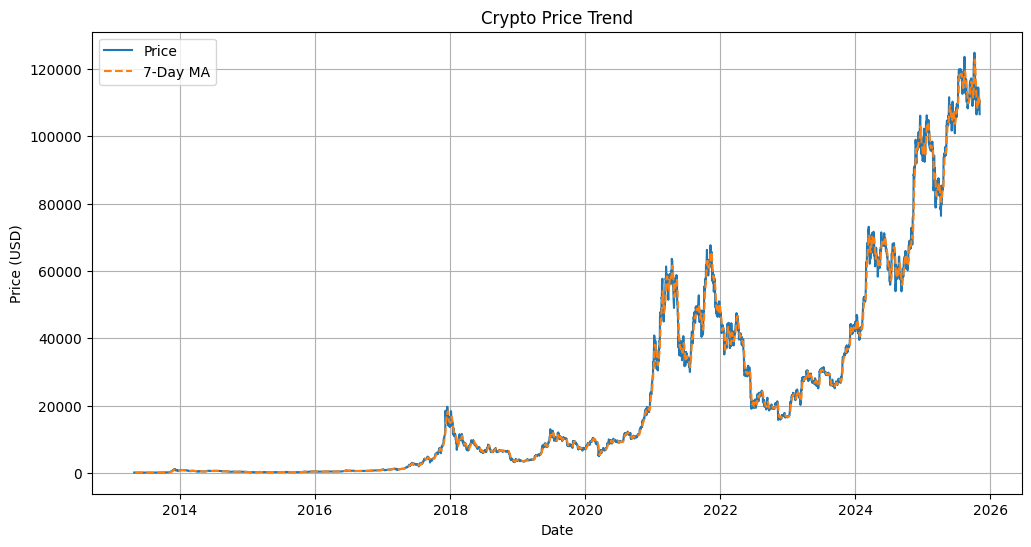

In [13]:
print('Price trend with moving average')
plt.figure(figsize=(12,6))
plt.plot(df.index, df['price'], label='Price')
plt.plot(df.index, df['7d_ma'], label='7-Day MA', linestyle='--')
plt.title("Crypto Price Trend")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


Daily returns


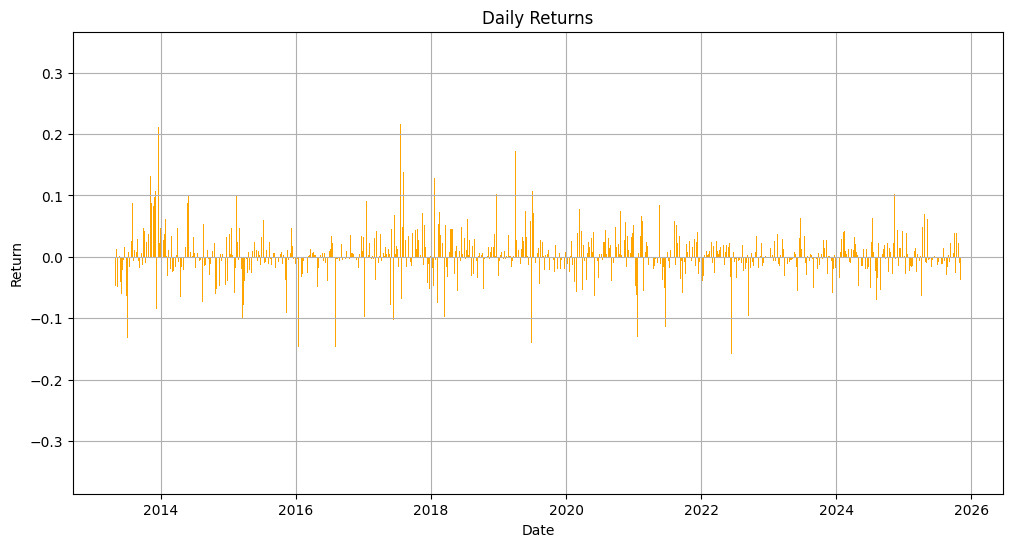

In [14]:
print('Daily returns')
plt.figure(figsize=(12,6))
plt.bar(df.index, df['daily_return'], color='orange')
plt.title("Daily Returns")
plt.xlabel("Date")
plt.ylabel("Return")
plt.grid(True)
plt.show()